# DATASETS & DATALOADERS

Pytorch provides two data primitives: 

- torch.utils.data.DataLoader 
- torch.utils.data.Dataset
that allow you to use pre-loaded datasets as well as your own data.

__Dataset__ stores the samples and their corresponding labels. 

__DataLoader__ wraps an iterable around the _Dataset_ to enable easy access to the samples. 

Here is an example of how to load the Fashion-MNIST dataset from TorchVision. Fashion-MNIST is a dataset of Zalando's article images consisting of 60,000 training examples and 10,000 test examples. Each example comprises a 28x28 grayscale image and an associated label from one of the 10 classes. 

We load the __FashionMNIST Dataset__ with the following parameters:

- _root_ is the path where the train/test data is stored, 
- _train_ specifies training or test dataset
- _download=True_ downloads the data from the internet if it's not available at _root_.
- _transform_ and _target_transfrom specify the features and label transformation. 


In [2]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
                root="data",
                train=True, 
                download=True, 
                transform=ToTensor())

test_data = datasets.FashionMNIST(
            root="data",
            train=False,
            download=True, 
            transform=ToTensor())
             

100.0%


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100.0%


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100.0%

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



## Iterating and Visualizing the Dataset

We can index _Datasets_ manually like a list: _training_data[index]_. We use _matplotlib_ to visualize some samples in our training data. 

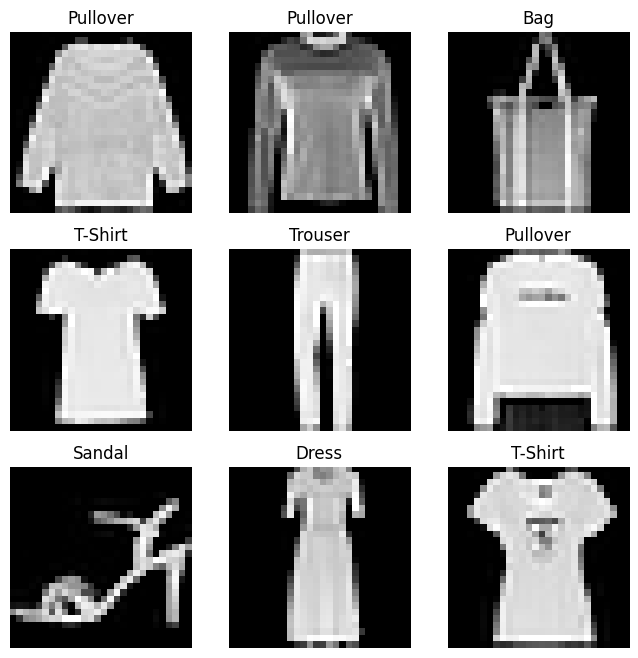

In [8]:
labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img.squeeze(), cmap="gray")
plt.show()

## Python

The items() method returns a view object. The view object contains the key-value pairs of the dictionary, as tuples in a list.



## Preparing your data for training with DataLoaders


The __Dataset__ retrieves our dataset’s features and labels one sample at a time. While training a model, we typically want to pass samples in _“minibatches”_, reshuffle the data at every epoch to reduce model overfitting, and use Python’s multiprocessing to speed up data retrieval.

__DataLoader__ is an iterable that abstracts this complexity for us in an easy API.



In [9]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)


## Iterate through the DataLoader

We have loaded that dataset into the DataLoader and can iterate through the dataset as needed. Each iteration below returns a batch of train_features and train_labels (containing batch_size=64 features and labels respectively). Because we specified shuffle=True, after we iterate over all batches the data is shuffled (for finer-grained control over the data loading order, take a look at Samplers).

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


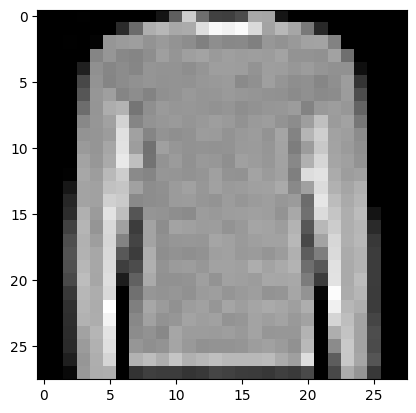

Label: 2


In [11]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")

# Learn some PyTorch!!

__torch.squeeze()__ Returns a tensor with all the dimensions of _input_ of size 1 removed. 

For example, if input is of shape: (A X 1 X B X C X 1 X D) then the out tensor will be of shape: (A X B X C X D). 

__Parameters__: 
- _input_ (Tensor)- the input tensor. 
- _dim_(int, optional)- if given, the input will be squeezed only in this direction. 

In [12]:
x = torch.zeros(2, 1, 2, 1, 2)
x.size()


torch.Size([2, 1, 2, 1, 2])

In [13]:
y = torch.squeeze(x)
y.size()

torch.Size([2, 2, 2])

In [14]:
y = torch.squeeze(x, 0)
y.size()

torch.Size([2, 1, 2, 1, 2])

In [15]:
y = torch.squeeze(x, 1)
y.size()

torch.Size([2, 2, 1, 2])